In [16]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
# from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import RMSprop
# from keras.wrappers.scikit_learn import KerasClassifier
# %pip install scikeras
from scikeras.wrappers import KerasClassifier
# from keras.constraints import maxnorm
from keras import backend as K
from keras import metrics
import functools

import warnings
warnings.filterwarnings('ignore')

# Datos

In [2]:
data = pd.read_csv('D:/Visual Studio Code/HK 6/Data Mining/RASFF-predictions-dashboard/Copia csvs antiguos/splited_alerts_strings.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train = data
train

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
71545,8,Netherlands,fruits_and_vegetables,food,serious,informing_recipient(s),distribution_to_non-member_countries,pesticide_residues,Netherlands,Netherlands,_
26710,3,United_Kingdom,"nuts,_nut_products_and_seeds",food,not_serious,destruction,product_not_(yet)_placed_on_the_market,adulteration_/_fraud,Iran,_,United_Kingdom
93828,12,Commission_Services,fruits_and_vegetables,food,undecided,_,distribution_on_the_market_(possible),composition,Japan,Belgium,Commission_Services
35208,5,Germany,food_contact_materials,fcm,serious,withdrawal_from_the_market,distribution_to_other_member_countries,metals,China,Austria,INFOSAN
4927,8,Denmark,ices_and_desserts,food,not_serious,withdrawal_from_the_market,distribution_to_other_member_countries,allergens,Poland,Denmark,_
...,...,...,...,...,...,...,...,...,...,...,...
47850,1,Italy,"nuts,_nut_products_and_seeds",food,not_serious,re-dispatch,product_allowed_to_travel_to_destination_under...,poor_or_insufficient_controls,Nigeria,_,Italy
61016,9,Germany,"soups,_broths,_sauces_and_condiments",food,not_serious,withdrawal_from_the_market,distribution_to_other_member_countries,food_additives_and_flavourings,Belgium,Finland,_
65195,5,Malta,"dietetic_foods,_food_supplements,_fortified_foods",food,not_serious,recall_from_consumers,distribution_to_other_member_countries,pesticide_residues,Slovakia,Italy,Czech_Republic
95615,10,Germany,"nuts,_nut_products_and_seeds",food,undecided,withdrawal_from_recipient(s),distribution_on_the_market_(possible),genetically_modified_food_or_feed,Belgium,Czech_Republic,_


In [3]:
features = [0,1,2,6,8]
target = [7]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [4]:
X 


,DATE_CASE,NOT_COUNTRY,PROD_CAT,DISTRIBUTION_STAT,COUNT_ORIGEN
71545,8,Netherlands,fruits_and_vegetables,distribution_to_non-member_countries,Netherlands
26710,3,United_Kingdom,"nuts,_nut_products_and_seeds",product_not_(yet)_placed_on_the_market,Iran
93828,12,Commission_Services,fruits_and_vegetables,distribution_on_the_market_(possible),Japan
35208,5,Germany,food_contact_materials,distribution_to_other_member_countries,China
4927,8,Denmark,ices_and_desserts,distribution_to_other_member_countries,Poland
...,...,...,...,...,...
47850,1,Italy,"nuts,_nut_products_and_seeds",product_allowed_to_travel_to_destination_under...,Nigeria
61016,9,Germany,"soups,_broths,_sauces_and_condiments",distribution_to_other_member_countries,Belgium
65195,5,Malta,"dietetic_foods,_food_supplements,_fortified_foods",distribution_to_other_member_countries,Slovakia
95615,10,Germany,"nuts,_nut_products_and_seeds",distribution_on_the_market_(possible),Belgium


In [5]:
y

,HAZARDS_CAT
71545,pesticide_residues
26710,adulteration_/_fraud
93828,composition
35208,metals
4927,allergens
...,...
47850,poor_or_insufficient_controls
61016,food_additives_and_flavourings
65195,pesticide_residues
95615,genetically_modified_food_or_feed


In [6]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [7]:
ency = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
ency.fit(y.values)
y_one_hot = ency.transform(y.values)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y_one_hot, test_size=0.2, random_state=42, shuffle = True)

In [9]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top3_acc'

# Modelo

In [10]:
K.clear_session()
model = Sequential()
model.add(Dense(2048, activation="relu", input_dim=len(X_train[1].toarray().flatten())))
model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(35, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])

c:\Users\Locc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()
hist = model.fit(X_train,y_train, epochs= 170,validation_data=( X_test, y_test), batch_size = 500)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │       587,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 35)             │        17,955 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,707 (12.32 MB)

 Trainable params: 3,228,707 (12.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/170
116/211 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - categorical_accuracy: 0.3789 - loss: 2.2490

KeyboardInterrupt: 

In [ ]:
prediction = model.predict(X_test[1], verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [ ]:
np.around(prediction,decimals = 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

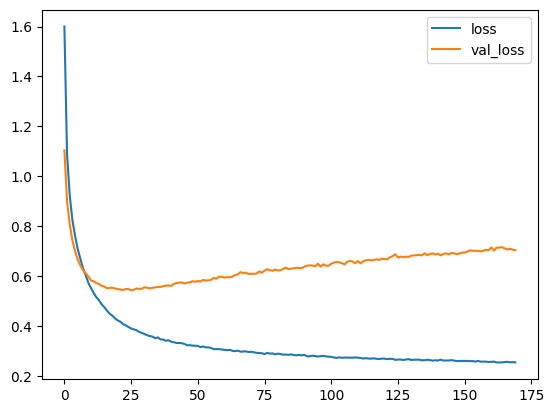

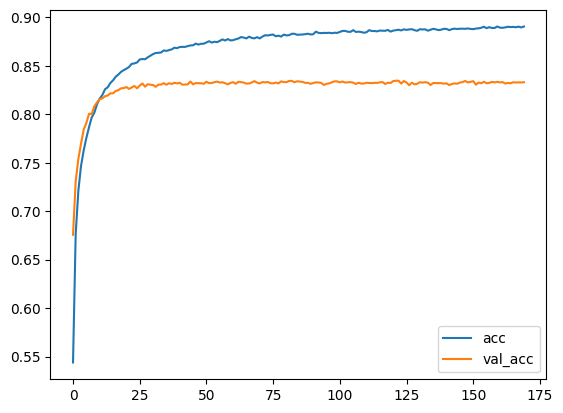

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

# Grid search tests

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Define the function to create the model, required for KerasClassifier
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(2500, activation=activation, input_dim=len(X_train[1].toarray().flatten())))
    model.add(Dense(1500, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(38, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=1, batch_size=500, epochs=30)

# Define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

param_grid={
    'model__activation':['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    }

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)

# Fit the grid search
grid_result = grid.fit(X_one_hot, y_one_hot)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [12]:
def create_model(activation = 'relu' ):
    model = Sequential()
    model.add(Dense(2500, activation=activation, input_dim=len(X_train[1].toarray().flatten())))
    model.add(Dense(1500, activation="relu"))
    model.add(Dense(1000, activation="relu"))
    model.add(Dense(38, activation = "softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

In [13]:
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size = 500, epochs = 30)

In [14]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)
param_grid={
    'model__activation':['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    }

In [17]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_one_hot, y_one_hot)

Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Locc\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Locc\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\Locc\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\Locc\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 938, in _fit
    self._fit_keras_model(
  File "C:\Users\Locc\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 535, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Locc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\Locc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 554, in categorical_crossentropy
    raise ValueError(
ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 35), output.shape=(None, 38)


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))